In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def deletebfroma(a,b):
    index = np.array([], dtype = np.int16)
    for number in range(len(a)):
        if a[number] in b:
            index = np.append(index, number)
 
    return np.delete(a, index)

In [6]:
class TSP(object):
    def __init__(self, xymax, numstop, men, mutaterate, verbose = False, best = True):
        self.numstop = numstop 
        self.best = best 
        self.verbose = verbose 
        self.men = men 
        self.xymax = xymax 
        self.mutaterate = mutaterate 
        self.targets = np.random.randint(xymax, size=(numstop, 2))
        self.men = np.empty((men, numstop), dtype = np.int32)
        for number in range(men):
            tempman = np.arange(numstop, dtype = np.int32)
            np.random.shuffle(tempman)
            self.men[number] = tempman
        self.best = np.array(self.bestsalesman())[...,0][0]
        
    def bestsalesman(self):
        temporder = np.empty([len(self.men), 2], dtype = np.int32)
        for number in range(len(self.men)):
            temporder[number] = [number, 0,]
        for number in range(len(self.men)):
            templength = 0
            for target in range(len(self.targets) - 1):
                diffx = abs(self.targets[self.men[number][target]][0] - self.targets[self.men[number][target + 1]][0])
                diffy = abs(self.targets[self.men[number][target]][1] - self.targets[self.men[number][target + 1]][1])
                diff = diffy + diffx
                templength = templength + diff
            diffx = abs(self.targets[self.men[number][0]][0] - self.targets[self.men[number][-1]][0])
            diffy = abs(self.targets[self.men[number][0]][1] - self.targets[self.men[number][-1]][1])
            diff = diffy + diffx
            templength = templength + diff
            temporder[number][1] = templength
        temporder = sorted(temporder, key=lambda x: -x[1])
        return temporder[int(len(temporder)/2):]
    
    def breed(self, parent1, parent2):
        halflength = round(len(self.men[parent1])/2) 
        start = np.random.randint(halflength)
        dna1 = self.men[parent1][start:start+halflength]
        dna2 = self.men[parent2][:]
        dna2 = deletebfroma(dna2,dna1)
        offspring = np.insert(dna2, start ,dna1)
        return offspring
    
    def breednewgeneration(self):
        best = np.array(self.bestsalesman())[...,0]
        for i in range(len(self.men)):
            if i not in best:
                self.men[i] = self.breed(random.choice(best), random.choice(best))
                
    def mutate(self):
        for i in range(len(self.men)):
            if self.best == True or i != self.best:
                for j in range(len(self.men[i]) - 1): 
                    if random.random() < self.mutaterate:
                            rand = random.randint(0, self.numstop - 1)
                            temp = self.men[i][j]
                            self.men[i][j] = self.men[i][rand]
                            self.men[i][rand] = temp
    def find(self, iterations):
        best = np.array(self.bestsalesman())[...,0][-1]
        bestlength = np.array(self.bestsalesman())[...,1][-1]
        print(self.men[best])
        print('best length: ', bestlength)
        self.draw(best)
        for number in range(iterations):
            if number == round(iterations/4):
                print("Status: 1/4")
            if number == round((iterations/4) * 2):
                print("Status: 2/4")
            if number == round((iterations/4) * 3):
                print("Status: 3/4")
            self.breednewgeneration()
            self.best = np.array(self.bestsalesman())[...,0][-1]
            self.mutate()
            if self.verbose == 1:
                bestlength = np.array(self.bestsalesman())[...,1][-1]
                print('best length: ', bestlength)
                worstlength = np.array(self.bestsalesman())[...,1][0]
                print('worst length: ', worstlength)
        best = np.array(self.bestsalesman())[...,0][-1]
        bestlength = np.array(self.bestsalesman())[...,1][-1]
        print(self.men[best])
        print('best length: ', bestlength)
        self.draw(best)
        
    def draw(self, index):
        plt.scatter(self.targets[[...,0]], self.targets[[...,1]], s=20)
        plt.show()
        plt.scatter(self.targets[[...,0]], self.targets[[...,1]], s=20)
        linearray = self.targets[self.men[index]]
        linearray = np.append(linearray, [linearray[0]], axis = 0)
        plt.plot(linearray[[...,0]], linearray[[...,1]])
        plt.show()

[2 6 0 5 4 1 3]
best length:  5118


/home/ani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:88: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


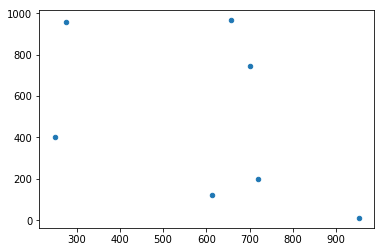

/home/ani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:90: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/ani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:93: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


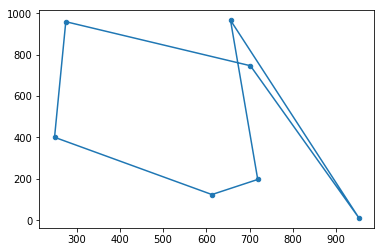

Status: 1/4
Status: 2/4
Status: 3/4
[4 2 6 0 1 5 3]
best length:  3320


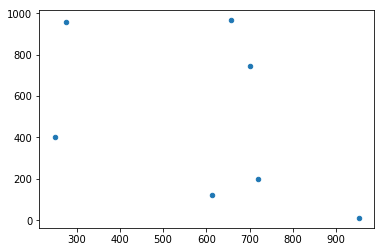

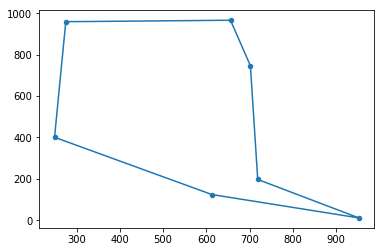

In [7]:
route = TSP(1000, 7, 5, 0.1, verbose = False, best = False)
route.find(500)